<a href="https://colab.research.google.com/github/KrRA1122/Machine-Learning-/blob/main/Machine_classification_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

#Step 1: Read the train data

In [3]:
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [4]:
df['Machine failure'].value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

In [5]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

<Axes: xlabel='Machine failure'>

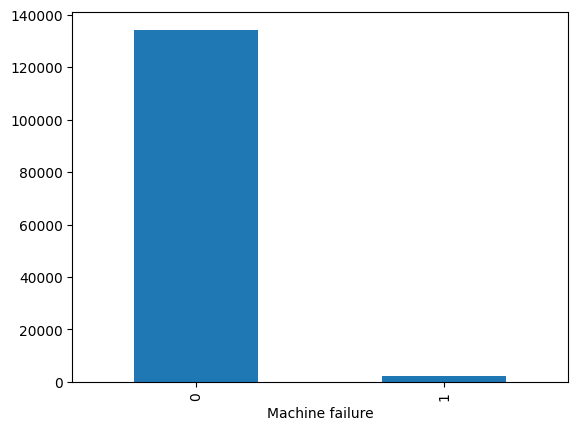

In [7]:
df['Machine failure'].value_counts().plot(kind='bar')

In [8]:
df.duplicated().sum()

0


#Step 2: Seperate X and Y(Machine failure)

In [9]:
X = df.drop(columns=['id', 'Product ID', 'Machine failure'])
Y = df[['Machine failure']]

In [10]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [11]:
Y.head()


,Machine failure
0,0
1,0
2,0
3,0
4,0


In [12]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

0 - Machine did not fail

1 - Machine FAILED

#Step 3: Create a preprocessing pipeline for X

In [13]:
# Seperate cat and con features
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [14]:
cat

['Type']

In [15]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [18]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


In [19]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [21]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

#Step 4: Apply train test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [23]:

xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


In [24]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [25]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [26]:
xtrain.shape,xtest.shape

((109143, 13), (27286, 13))

#Step 5: Algorithm Evaluation

Because Dataset size is quite large skip KNN and SVM

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [28]:
dct = {'Logistic Regression': LogisticRegression(),
       'Decision Tree':DecisionTreeClassifier(),
       'Random Forest':RandomForestClassifier(),
       'Gradient Boost':GradientBoostingClassifier()}

In [29]:
dct.items()

dict_items([('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('Random Forest', RandomForestClassifier()), ('Gradient Boost', GradientBoostingClassifier())])

In [30]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [31]:
train = []
test = []
train_cv = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Get f1 macro score in train and test
    f1_train = f1_score(ytrain, ypred_train, average='macro')
    f1_test = f1_score(ytest, ypred_test, average='macro')
    # Get the Cross validated f1 score
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Save above results in list
    train.append(f1_train)
    test.append(f1_test)
    train_cv.append(f1_cv)
    # Print above results
    print(f'Model Name : {name}\n')
    print(f'F1 Train : {f1_train:.4f}')
    print(f'F1 Test : {f1_test:.4f}')
    print(f'F1 Train CV 5 fold : {f1_cv:.4f}')
    print('\n==============================================\n')

Model Name : Logistic Regression

F1 Train : 0.9303
F1 Test : 0.9315
F1 Train CV 5 fold : 0.9301


Model Name : Decision Tree

F1 Train : 0.9975
F1 Test : 0.8756
F1 Train CV 5 fold : 0.8689


Model Name : Random Forest

F1 Train : 0.9975
F1 Test : 0.9311
F1 Train CV 5 fold : 0.9273


Model Name : Gradient Boost

F1 Train : 0.9357
F1 Test : 0.9309
F1 Train CV 5 fold : 0.9286




Save above results in dataframe

In [32]:
res = {'name':list(dct.keys()),
       'F1 Train':train,
       'F1 Test':test,
       'F1 CV':train_cv}

In [33]:
res

{'name': ['Logistic Regression',
  'Decision Tree',
  'Random Forest',
  'Gradient Boost'],
 'F1 Train': [0.9302961192536252,
  0.9974641142940155,
  0.9974670426617058,
  0.9357206926028347],
 'F1 Test': [0.9314565053016581,
  0.8756136514052657,
  0.9310660054302231,
  0.9308524696197872],
 'F1 CV': [0.930148826025286,
  0.8689226251050497,
  0.9273186175311061,
  0.9286306701002409]}

In [34]:
df_res = pd.DataFrame(res)
df_res

,name,F1 Train,F1 Test,F1 CV
0,Logistic Regression,0.930296,0.931457,0.930149
1,Decision Tree,0.997464,0.875614,0.868923
2,Random Forest,0.997467,0.931066,0.927319
3,Gradient Boost,0.935721,0.930852,0.928631


In [35]:
df_res.sort_values(by='F1 CV', ascending=False)

,name,F1 Train,F1 Test,F1 CV
0,Logistic Regression,0.930296,0.931457,0.930149
3,Gradient Boost,0.935721,0.930852,0.928631
2,Random Forest,0.997467,0.931066,0.927319
1,Decision Tree,0.997464,0.875614,0.868923


Select Logistic Regression as the Final Model as it has highest F1 Macro of 0.93

Build and Evaluate Logistic Regression

In [36]:
best_model = LogisticRegression()
best_model.fit(xtrain, ytrain)

LogisticRegression()

In [37]:
best_model.score(xtrain, ytrain)

0.9961884866642845

In [39]:
best_model.score(xtest, ytest)

0.9961518727552591

Plot the confusion matrix

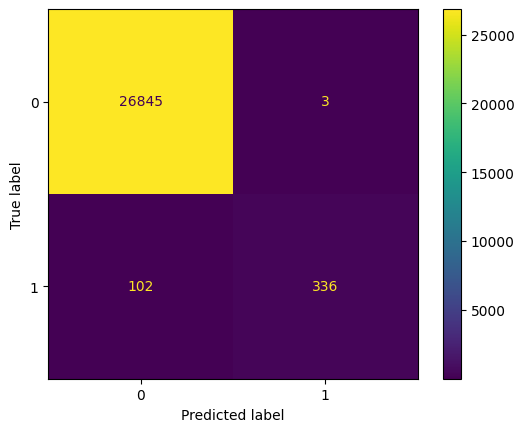

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

Print the classification Report

In [41]:
ypred_train = best_model.predict(xtrain)
ypred_test = best_model.predict(xtest)

In [42]:
ypred_train[0:5]

array([0, 0, 0, 0, 0])

In [43]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [45]:
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [46]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



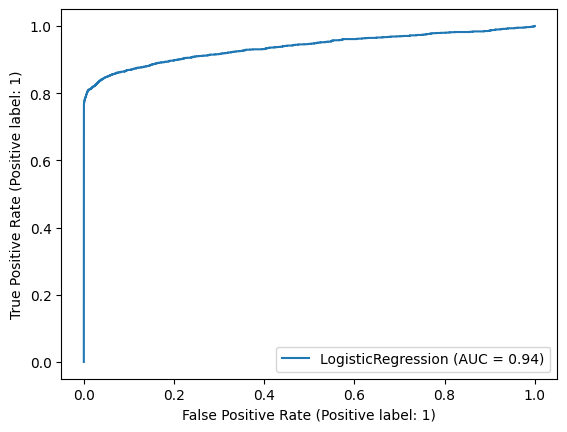

In [49]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtrain, ytrain)

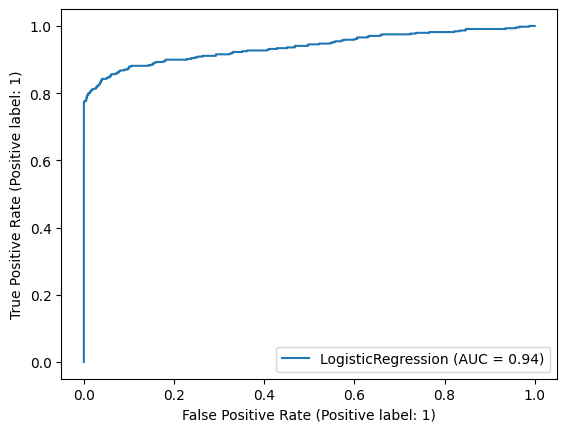

In [50]:
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [51]:
scores_roc = cross_val_score(best_model, xtrain, ytrain, cv=5, scoring='roc_auc')
scores_roc

array([0.94160001, 0.93028717, 0.95428148, 0.92771629, 0.92533918])

In [53]:
scores_roc.mean()

0.9358448272945527

ROC_AUC Cross Validated score is 0.9357 > 0.8 hence above model is good

#Step 6: Get Out of Sample predictions

In [54]:
xnew = pd.read_csv('/content/test.csv')
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [55]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Air temperature [K]',
                                  'Process temperature [K]',
                                  'Rotational speed [rpm]', 'Torque [Nm]',
                                  'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF',
                                  'RNF']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Type'])])

In [56]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


Predict the results with probability

In [57]:
preds = best_model.predict(xnew_pre)
probs = best_model.predict_proba(xnew_pre)

In [58]:
preds[0:5]

array([0, 0, 0, 0, 0])

In [59]:
best_model.classes_

array([0, 1])

In [60]:
probs[0:5]

array([[0.99786215, 0.00213785],
       [0.99895091, 0.00104909],
       [0.99732555, 0.00267445],
       [0.99698257, 0.00301743],
       [0.99629114, 0.00370886]])

In [61]:
probs_fail = probs[:,1]
probs_fail[0:5]

array([0.00213785, 0.00104909, 0.00267445, 0.00301743, 0.00370886])

Save above results in Dataframe

In [62]:
df_final = xnew[['id']]
df_final

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [63]:
df_final['Machine_failure_pred'] = preds
df_final['Probability'] = probs_fail

In [64]:
df_final

,id,Machine_failure_pred,Probability
0,136429,0,0.002138
1,136430,0,0.001049
2,136431,0,0.002674
3,136432,0,0.003017
4,136433,0,0.003709
...,...,...,...
90949,227378,0,0.002260
90950,227379,0,0.000445
90951,227380,0,0.003081
90952,227381,0,0.002421


In [65]:
df_final['Machine_failure_pred'].value_counts()

Machine_failure_pred
0    89848
1     1106
Name: count, dtype: int64

<Axes: xlabel='Machine_failure_pred'>

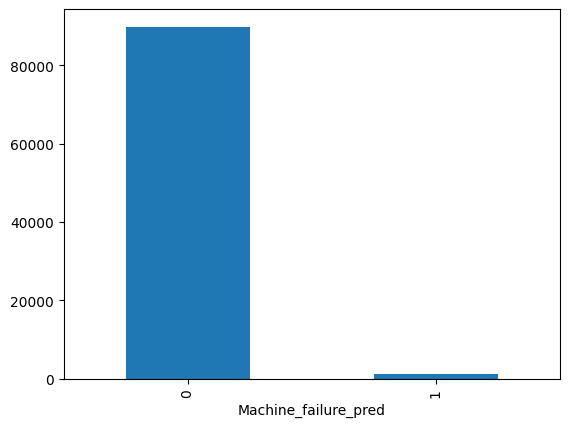

In [66]:
df_final['Machine_failure_pred'].value_counts().plot(kind='bar')

In [67]:
df_final[df_final['Machine_failure_pred']==1]

,id,Machine_failure_pred,Probability
17,136446,1,0.992786
209,136638,1,0.995766
223,136652,1,0.989309
397,136826,1,0.996819
405,136834,1,0.998681
...,...,...,...
90503,226932,1,0.988856
90665,227094,1,0.999807
90679,227108,1,0.752607
90784,227213,1,0.983816


Save dataframe to results.csv

In [68]:
df_final.to_csv('Results.csv', index=False)